<a href="https://colab.research.google.com/github/zha70/zha70/blob/main/PNumber_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [32]:
mnist=keras.datasets.mnist

In [33]:
(train_features,train_labels),(test_features,test_labels)=mnist.load_data()

In [34]:
train_features.shape

(60000, 28, 28)

In [35]:
test_features.shape

(10000, 28, 28)

5


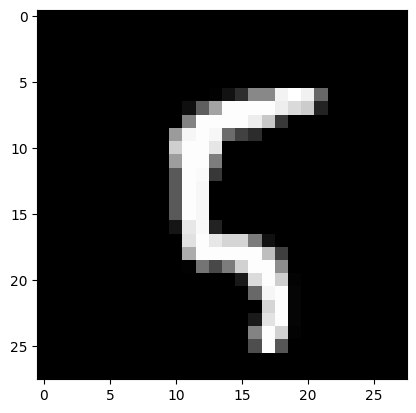

In [36]:

idx=100
img=train_features[idx]

print(train_labels[idx])

plt.gray()
plt.imshow(img)

Preprocessing

In [37]:
np.min(img),np.max(img)

(0, 255)

In [38]:
train_features=train_features/255
test_features=test_features/255

model definition

In [39]:
img=test_features[0]
img.shape

(28, 28)

In [40]:
model=keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128,activation="relu"))
model.add(keras.layers.Dense(units=128,activation="relu"))
model.add(keras.layers.Dense(units=10,activation="softmax"))

In [41]:
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

In [42]:
model.build(input_shape=(None,28,28))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
hist=model.fit(train_features,train_labels,epochs=1000,batch_size=256,validation_data=(test_features,test_labels))

Epoch 1/1000
235/235 [==============================] - 2s 5ms/step - loss: 0.3898 - accuracy: 0.8940 - val_loss: 0.1815 - val_accuracy: 0.9464
Epoch 2/1000
235/235 [==============================] - 1s 5ms/step - loss: 0.1515 - accuracy: 0.9556 - val_loss: 0.1338 - val_accuracy: 0.9581
Epoch 3/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.1086 - accuracy: 0.9675 - val_loss: 0.1018 - val_accuracy: 0.9695
Epoch 4/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0817 - accuracy: 0.9756 - val_loss: 0.0956 - val_accuracy: 0.9707
Epoch 5/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0653 - accuracy: 0.9809 - val_loss: 0.0842 - val_accuracy: 0.9736
Epoch 6/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0551 - accuracy: 0.9839 - val_loss: 0.0805 - val_accuracy: 0.9749
Epoch 7/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0452 - accuracy: 0.9868 - val_loss: 0.0757 - val_accuracy:

In [44]:
model.evaluate(test_features,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2814 - accuracy: 0.9819


[0.2813628613948822, 0.9818999767303467]

In [45]:
idx=100
img=test_features[idx]
print(test_labels[idx])

6


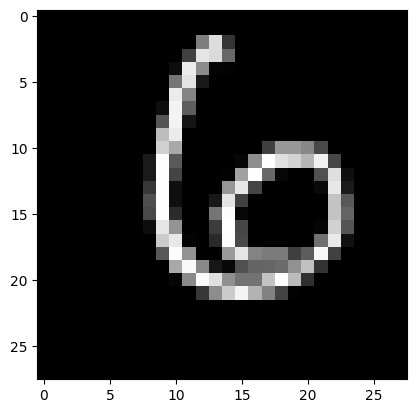

In [46]:
plt.gray()
plt.imshow(img)

In [47]:
test_data=np.reshape(img,(-1,784))
test_data.shape

(1, 784)

In [48]:
model.predict(test_data)

1/1 [==============================] - 0s 97ms/step


array([[3.4343467e-28, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.1682753e-31, 1.0000000e+00, 7.5450590e-38,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

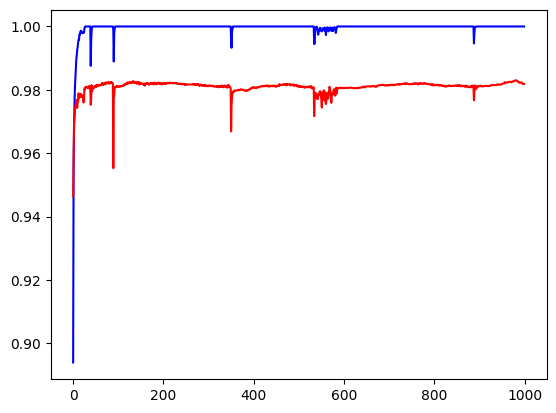

In [49]:
acc=hist.history["accuracy"]
val_acc=hist.history["val_accuracy"]

plt.plot(acc,color="blue")
plt.plot(val_acc,color="red")